**Метанпромбанк**

**Цель:** увеличение прибыли банка и минимизация затрат. Аналитика клиентов банка для продакт менеджера, который будет решать какие продукты предлагать и каким клиентам.

**Задачи:**
- сегментирование пользователей банка по количеству потребляемых продуктов банка
- аналитика клиентов и их признаков в каждом сегменте
- составление портетов клиентов в каждом сегмента
- анализ оттока в каждом сегменте
- проверка гипотез на основе предоставленных данных
 - Гипотеза 1: Различия дохода между клиентами, пользующимися двумя продуктами банка, и клиентами, пользующимися одним
 - Гипотеза 2: Различия баланса между клиентами, которые ушли, и теми, кто остался
 - Гипотеза 3: Различия в количестве используемых продуктов банка между группой оттока и действующими клиентами
 - Гипотеза 4: Различия баллов кредитного скорринга между клиентами, пользующимися двумя продуктами и четырьмя 
- рекомендации бизнесу по удержанию клиентов и увеличению прибыли банка

# Загрузка

## Загрузка библиотек

In [1]:
#conda install -c conda-forge imbalanced-learn

In [2]:
#загружаем библиотеки
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from itertools import combinations
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.metrics import silhouette_score
import sklearn
from sklearn.metrics import classification_report
from imblearn.under_sampling import NearMiss
import plotly.graph_objs as go
from scipy import stats as st
import math as mth
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from sklearn.feature_selection import SelectFromModel
import numpy as np
import warnings
import re 
warnings.filterwarnings("ignore")
import imblearn


## Загрузка файла

In [3]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_dataset.csv')
data.head(7)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0


# Предобработка данных

## Обзор данных

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


- В нашем распоряжении датасет, в котором 10.000 строк и 12 столбцов. Есть пропуски скорее всего, а колонка `Balance` содержит всего 6383 строки. 
- Три типа данных: `float`, `int`, `object`
- Название столбцов нарушают "правила хорошего тона", нужно изменить

**Описание данных:**
- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет

## Названия колонок

In [5]:
#приведем все названия к нижнему регистру
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   creditcard        10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
data.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'creditcard', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')

Мы привели названия колонок к нижнему регистру, переименовывать не будем, в целом все хорошо.

## Пропущенные значения

In [7]:
#проверяем пропуски
data.isna().sum()

userid                 0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             3617
products               0
creditcard             0
loyalty                0
estimated_salary       0
churn                  0
dtype: int64

In [8]:
#посмотрим колонку balance
data['balance'].head()

0          NaN
1     83807.86
2    159660.80
3          NaN
4    125510.82
Name: balance, dtype: float64

In [9]:
data.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


В этой колонке хранится информация о балансе на счету клиента. Происхождение пропуска не известно и пропуск никак не связан с другими столбцами. Относительно общего числа строк (10000) пропусков 3617 - 36%, что очень много. Скорее всего наличие пропуска - отсутствие дебетового счета, заменять пропуски нулем не будем, чтобы не испортить результаты анализа.

## Типы данных

In [10]:
#приведем колонку gender к типу int
def gender(g):
    if g=='Ж':
        return 1
    else:
        return 0

data['gender'] = data['gender'].apply(gender)
data['gender'] = data['gender'].astype('int64')
data

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,1,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,1,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,1,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,1,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,0,39,5,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,0,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,1,36,7,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,0,42,3,75075.31,2,1,0,92888.52,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  int64  
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   creditcard        10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 937.6+ KB


остальные типы данных подходят для дальнейшей работы

## Дубликаты

In [12]:
#посмотрим есть ли в таблице дубликаты
data.duplicated().sum()

0

Ура, дубликатов нет

## Вывод 2 шага

В ходе предобработки дынных мы изучили состав таблицы, колонки и их значения. Привели все названия к нижнему регистру, нашли и заменили пропуски, проверили датасет на дубликаты и привели колонки к нужнему типу данных.

_____

# EDA - Исследовательский анализ данных

## Исследование данных на аномалии

Обнаружение выбросов (также известное как обнаружение аномалий) — это процесс поиска объектов данных, поведение которых сильно отличается от ожидаемого. Чтобы лучше осознать смысл выбросов, надо понимать, что отличает аномалию от шума. С точки зрения логики, наши показатели не могут быть отрицательным, "нормальное" значение должно быть положительным числом.

В наших данных выбросы могут быть в колонках:

- score — баллы кредитного скоринга,
- Age — возраст,
- Balance — баланс на счёте,
- estimated_salary — заработная плата клиента,

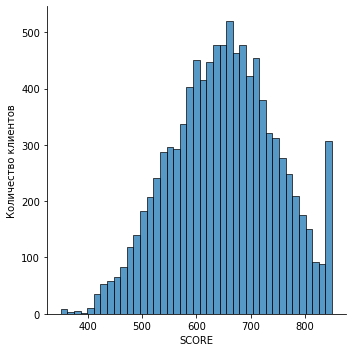

In [13]:
#создадим диаграмму рассеивания

sns.displot(data, x='score', palette="tab10", kind='hist')
plt.ylabel('Количество клиентов')
plt.xlabel('SCORE')
plt.show()

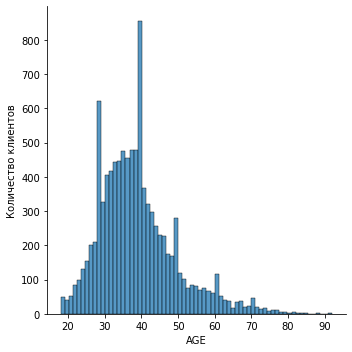

In [14]:
sns.displot(data, x='age', palette="tab10", kind='hist')
plt.ylabel('Количество клиентов')
plt.xlabel('AGE')
plt.show()

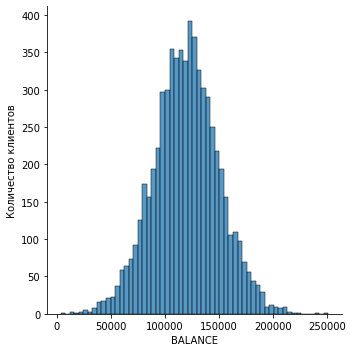

In [15]:
sns.displot(data, x='balance', palette="tab10", kind='hist')
plt.ylabel('Количество клиентов')
plt.xlabel('BALANCE')
plt.show()

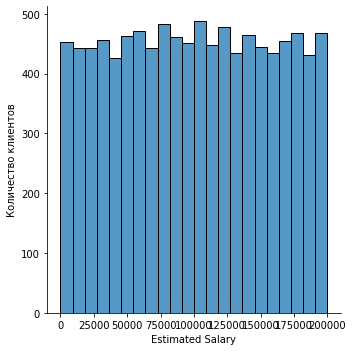

In [16]:
sns.displot(data, x='estimated_salary', palette="tab10", kind='hist')
plt.ylabel('Количество клиентов')
plt.xlabel('Estimated Salary')
plt.show()

- На графике `score` видно выбросы в районе 850 баллов. Происхождение не известно, возможно техническая ошибка или человеческий фактор, но врядли столько людей имеют самый высокий балл

- На графике `age` явных выбросов нет, есть только большое преимущество двух возрастов, возможно это связано с определенной акцие банка, который привлек людей одного возраста

- На графике `balance` есть небольшое количество клиентов с высоким показателем, вероятно это и правда так

## Анализ качества признаков

**Посмотрим информацию по каждой колонке**

In [17]:
data['score'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: score, dtype: float64

- `score` - баллы кредитного скоринга. Минимальное значение - **350**, Максимальное - **850**, среднее - **650**. Порог, установленный банком для выдачи кредита, не известен

In [18]:
data['city'].value_counts()

Ярославль         5014
Ростов Великий    2509
Рыбинск           2477
Name: city, dtype: int64

- `city` - три города, но в Ярославле живет половина клиентов

In [19]:
data['gender'].value_counts()

0    5457
1    4543
Name: gender, dtype: int64

- `gender` - мужчин и женщин почти по-ровну. 

In [20]:
data['age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64

- `age` - возраст - Минимальный возраст - **18**, максимальный **92**. В среднем клиентам банка **39** лет

In [21]:
data['objects'].describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: objects, dtype: float64

- `objects` - количество объектов в собственности - минимум **0**, максимум **10**, в среднем **5**

In [22]:
data['balance'].describe()

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: balance, dtype: float64

- `balance` - на счету у клиентов максимум **250.898**, минимум **3768**, а в среднем **119.789** (скорее всего рублей)

In [23]:
data['products'].describe()

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: products, dtype: float64

- `products` - максимальное число продуктов, которыми пользуются клиенты - **4**, минимально **1**, в среднем **1,5**

In [24]:
data['creditcard'].value_counts()

1    7055
0    2945
Name: creditcard, dtype: int64

- `creditcard` - у 7055 (**70%**) есть кридитная карта, а у **30%** нет

In [25]:
data['loyalty'].value_counts()

1    5151
0    4849
Name: loyalty, dtype: int64

- `loyalty` - большинство клиентов активны, но в целом этот показатель 50\50

In [26]:
data['estimated_salary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: estimated_salary, dtype: float64

- `estimated_salary` - зп клиентов от 11 до 200тыс. В среднем клиент банка получает **100.000**

In [27]:
data['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

- `churn` - факт оттока. **20%** клиентов сейчас находятся в категории "оттока"

## Средние значения признаков в двух группах

Разделим наших клиентов на две группы: те, кто ушел, и те, кто остался

In [28]:
#группируем по признаку оттока и записываем в новый датафрейм
churn = data.groupby('churn').mean()
churn

,userid,score,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary
churn,,,,,,,,,,
0,1.573390e+07,651.853196,0.427477,37.408389,5.033279,119535.864270,1.544267,0.707146,0.554565,99738.391772
1,1.573279e+07,645.351497,0.559156,44.837997,4.932744,120746.971132,1.475209,0.699067,0.360825,101465.677531


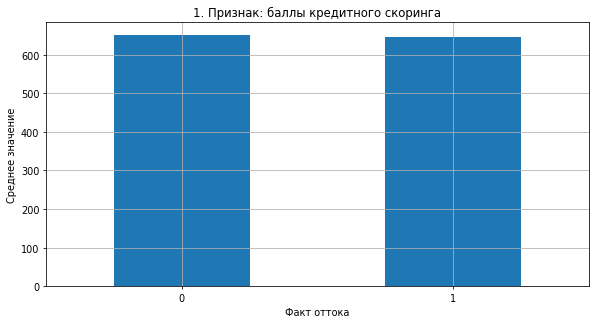

In [29]:
#построим столбчатые гистограммы по каждому признаку
plt.figure(figsize=(10,5))
churn['score'].plot(kind='bar', grid=True)
plt.gcf().set_dpi(70)

old_ticks, old_labels = plt.xticks()
plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels], rotation=0)

plt.ylabel('Среднее значение')
plt.xlabel('Факт оттока')
plt.title('1. Признак: баллы кредитного скоринга')
plt.show()

**1. Признак: баллы кредитного скоринга** - в группах нет разницы в средней кредитной оценке

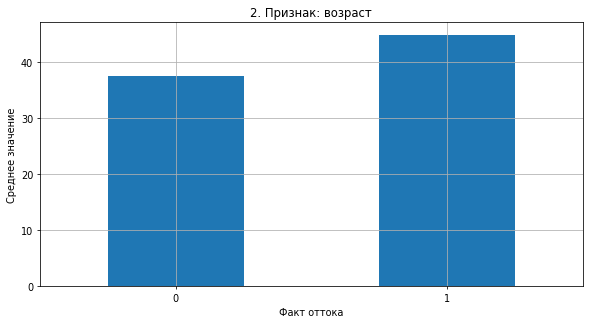

In [30]:
plt.figure(figsize=(10,5))
churn['age'].plot(kind='bar', grid=True)
plt.gcf().set_dpi(70)

old_ticks, old_labels = plt.xticks()
plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels], rotation=0)

plt.ylabel('Среднее значение')
plt.xlabel('Факт оттока')
plt.title('2. Признак: возраст')
plt.show()

**2. Признак: возраст** - врядли этот факт влияет на отток, но те клиенты, кто остался с банком, в среднем немного младше

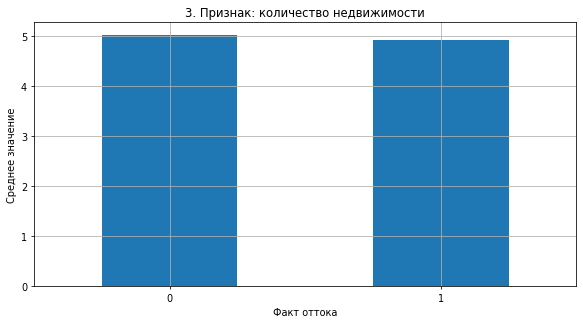

In [31]:
plt.figure(figsize=(10,5))
churn['objects'].plot(kind='bar', grid=True)
plt.gcf().set_dpi(70)

old_ticks, old_labels = plt.xticks()
plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels], rotation=0)

plt.ylabel('Среднее значение')
plt.xlabel('Факт оттока')
plt.title('3. Признак: количество недвижимости')
plt.show()

**3. Признак: количество недвижимости** - значения почти равны, немного меньше средняя величина у группы оттока

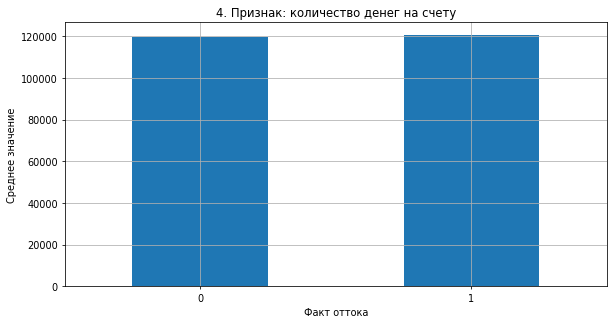

In [32]:
plt.figure(figsize=(10,5))
churn['balance'].plot(kind='bar', grid=True)
plt.gcf().set_dpi(70)

old_ticks, old_labels = plt.xticks()
plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels], rotation=0)

plt.ylabel('Среднее значение')
plt.xlabel('Факт оттока')
plt.title('4. Признак: количество денег на счету')
plt.show()

**4. Признак: количество денег на счету** - разница тоже не большая, но клиенты с чуть большим счетом попали в группу оттока

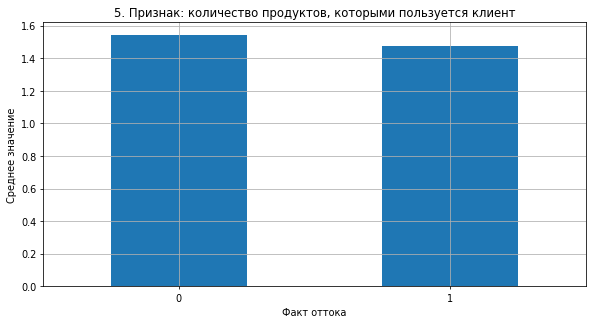

In [33]:
plt.figure(figsize=(10,5))
churn['products'].plot(kind='bar', grid=True)
plt.gcf().set_dpi(70)

old_ticks, old_labels = plt.xticks()
plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels], rotation=0)

plt.ylabel('Среднее значение')
plt.xlabel('Факт оттока')
plt.title('5. Признак: количество продуктов, которыми пользуется клиент')
plt.show()

**5. Признак: количество продуктов, которыми пользуется клиент** - не сильная разница, но меньше продуктов у группы оттока

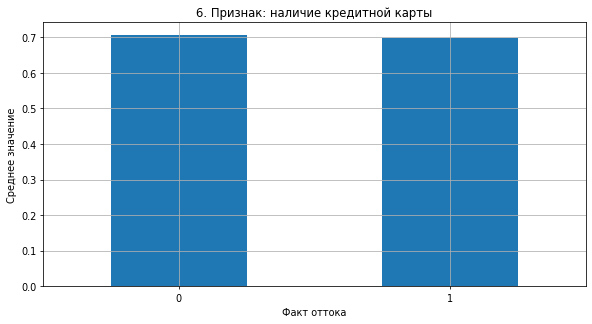

In [34]:
plt.figure(figsize=(10,5))
churn['creditcard'].plot(kind='bar', grid=True)
plt.gcf().set_dpi(70)

old_ticks, old_labels = plt.xticks()
plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels], rotation=0)

plt.ylabel('Среднее значение')
plt.xlabel('Факт оттока')
plt.title('6. Признак: наличие кредитной карты')
plt.show()

**6. Признак: наличие кредитной карты** - здесь почти по-ровну

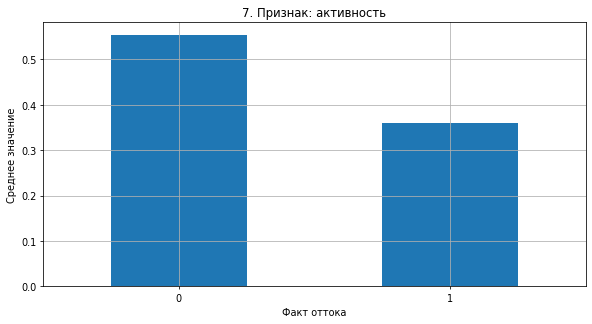

In [35]:
plt.figure(figsize=(10,5))
churn['loyalty'].plot(kind='bar', grid=True)
plt.gcf().set_dpi(70)

old_ticks, old_labels = plt.xticks()
plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels], rotation=0)

plt.ylabel('Среднее значение')
plt.xlabel('Факт оттока')
plt.title('7. Признак: активность')
plt.show()

**7. Признак: активность** - логично, что у группы оттока активность ниже

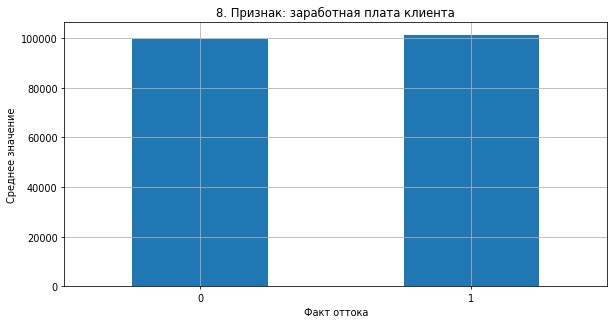

In [36]:
plt.figure(figsize=(10,5))
churn['estimated_salary'].plot(kind='bar', grid=True)
plt.gcf().set_dpi(70)

old_ticks, old_labels = plt.xticks()
plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels], rotation=0)

plt.ylabel('Среднее значение')
plt.xlabel('Факт оттока')
plt.title('8. Признак: заработная плата клиента')
plt.show()

**8. Признак: заработная плата клиента** - то почти по-ровну, у группы оттока немного выше зп

Можно сказать, что нет сильной зависимости факта оттока от какого-то из признаков на текущий момент. 

## Матрица корреляции

In [37]:
#добавим новые столбцы для городов
data['city_int'] = data['city'].map({'Ярославль':0, 'Рыбинск':1, 'Ростов Великий':2})

# преобразуем датафрейм методом get_dummies(), чтобы для каждого города, был свой столбец

data = pd.get_dummies(data)
data = data.drop('city_int', axis=1)
data

,userid,score,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,city_Ростов Великий,city_Рыбинск,city_Ярославль
0,15677338,619,1,42,2,NaN,1,1,1,101348.88,1,0,0,1
1,15690047,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,15662040,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0,1
3,15744090,699,1,39,1,NaN,2,0,0,93826.63,0,0,0,1
4,15780624,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,0,39,5,NaN,2,1,0,96270.64,0,0,0,1
9996,15612628,516,0,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,15627268,709,1,36,7,NaN,1,0,1,42085.58,1,0,0,1
9998,15725091,772,0,42,3,75075.31,2,1,0,92888.52,1,1,0,0


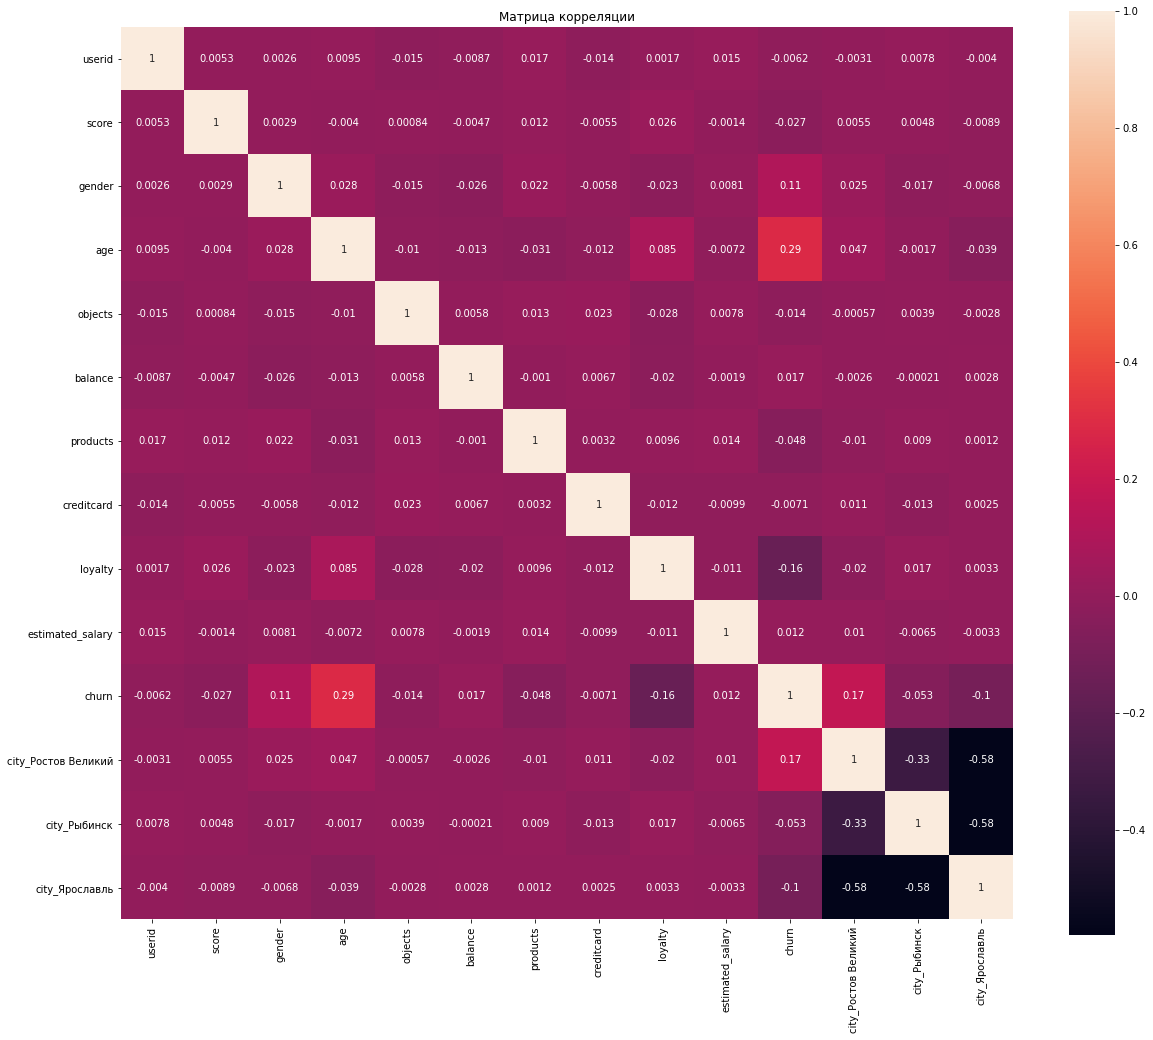

In [38]:
#построим и отрисуем матрицу корреляций
cm = data.corr() 

plt.figure(figsize=(20,17))
sns.heatmap(cm, annot=True, square=True)


plt.title('Матрица корреляции')
plt.show()

Есть несколько признаков, пересечение которых, влияют друг на друга заметно больше остальных. Но в целом матрица распределена равномерно.
Больше всего на целевую переменную `churn` влияют: age, loyality, gender и город Ростов  

## Распределение признаков

In [39]:
data.head()

,userid,score,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,city_Ростов Великий,city_Рыбинск,city_Ярославль
0,15677338,619,1,42,2,NaN,1,1,1,101348.88,1,0,0,1
1,15690047,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,15662040,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0,1
3,15744090,699,1,39,1,NaN,2,0,0,93826.63,0,0,0,1
4,15780624,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [40]:
#разделим признаки на бинарные и небинарные
binar = data[['gender', 'creditcard', 'loyalty', 'city_Ростов Великий', 'city_Рыбинск', 'city_Ярославль' ]]
binar.head()

,gender,creditcard,loyalty,city_Ростов Великий,city_Рыбинск,city_Ярославль
0,1,1,1,0,0,1
1,1,0,1,0,1,0
2,1,1,0,0,0,1
3,1,0,0,0,0,1
4,1,1,1,0,1,0


In [41]:
nobinar = data[['score' ,'age', 'objects', 'balance', 'products', 'estimated_salary']]
nobinar.head()

,score,age,objects,balance,products,estimated_salary
0,619,42,2,NaN,1,101348.88
1,608,41,1,83807.86,1,112542.58
2,502,42,8,159660.80,3,113931.57
3,699,39,1,NaN,2,93826.63
4,850,43,2,125510.82,1,79084.10


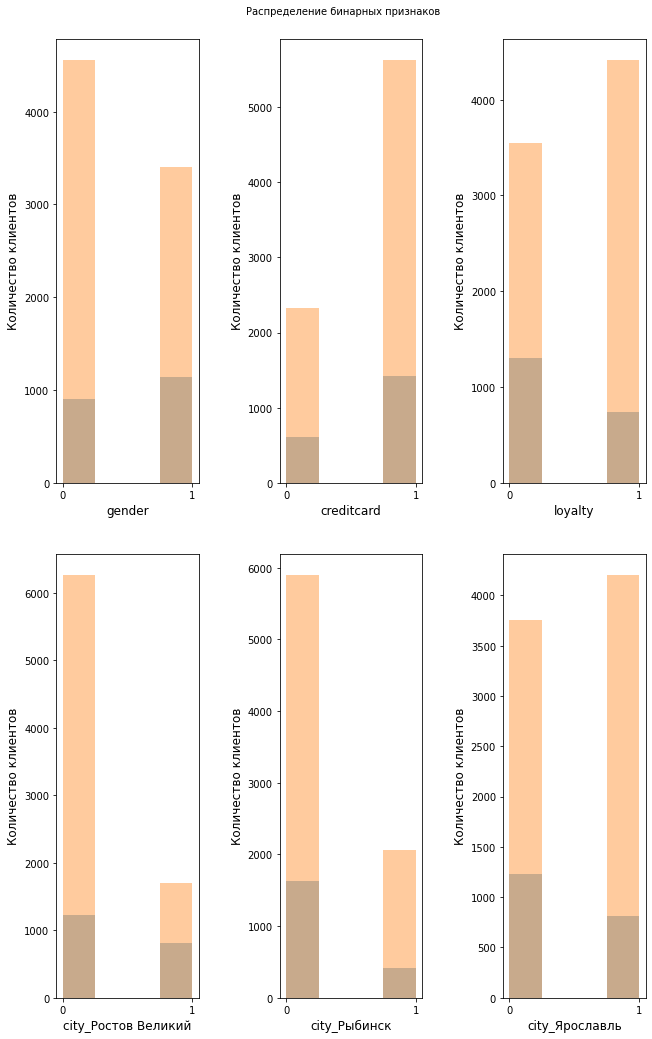

In [42]:
#распределение бинарных признаков
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,15))
axes_list = [item for sublist in axes for item in sublist]
fig.tight_layout(pad=5.0)
fig.suptitle('Распределение бинарных признаков', fontsize=10)
for b in binar:
    ax = axes_list.pop(0)
    sns.distplot(data.query('churn == 1')[b].astype(int), bins=4, ax=ax, kde=False)
    sns.distplot(data.query('churn == 0')[b].astype(int), bins=4, ax=ax, kde=False)
    ax.set_xticks([0,1])
    ax.set_xlabel(b, fontsize=12)
    ax.set_ylabel('Количество клиентов', fontsize=12)
    
plt.show()

На графиках значение 0 - нет, 1 - да. Цветное распределение - это распределение по оттоку (розовый - остались, коричневый - ушли).

- `gender` - мужчины в меньшей степени "уходят" из банка
- `creditcard` - наличие кредитной карты удерживает клиентов больше
- `loyalty` - чем активнее клиент, тем больше вероятность того, что он останется
- `city` - в Ростове больший % оттока, а Ярославле клиенты чаще остаются с банком

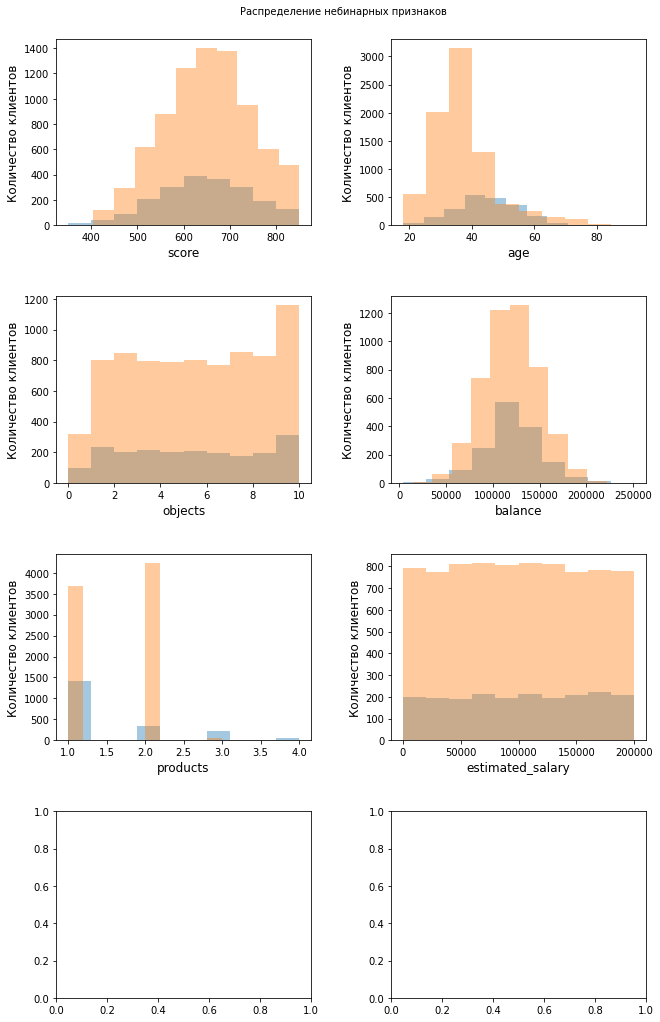

In [43]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,15))
axes_list = [item for sublist in axes for item in sublist]
fig.tight_layout(pad=5.0)
fig.suptitle('Распределение небинарных признаков', fontsize=10)
for d in nobinar:
    ax = axes_list.pop(0)
    sns.distplot(data.query('churn == 1')[d], bins=10, ax=ax, kde=False)
    sns.distplot(data.query('churn == 0')[d], bins=10, ax=ax, kde=False)
    ax.set_xlabel(d, fontsize=12)
    ax.set_ylabel('Количество клиентов', fontsize=12)

Цвета: розовый - остались, коричневый(он же голубой) - ушли.

- `score` - чем ниже оценка клиента, тем больше его вероятность попасть в группу оттока
- `age` - чем младше клиент, тем он преданее банку
- `object` - в группу оттока попали те, у кого намного меньше недвижимости
- `balance` - больше людей остаются из тех, у кого на счетах от 100 до 150
- `products` - уходят те, кто пользовался 3 и более продуктами, что не очень логично
- `estimated_salary` - здесь картина равномерная

In [44]:
data['churn'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: churn, dtype: float64

**Посмотрим как город влияет на отток**

In [45]:
c = data[['city_Ростов Великий', 'city_Рыбинск', 'city_Ярославль', 'churn']]
c = c.groupby('churn').sum()
c

,city_Ростов Великий,city_Рыбинск,city_Ярославль
churn,,,
0,1695.0,2064.0,4204.0
1,814.0,413.0,810.0


- 1 - Ярославль - 16% отток
- 2 - Ростов Великий - 32% отток
- 3 - Рыбинск - 16% отток


## Вывод 3 шага

- Всего записей в таблице 10.000 и 10 признаков.
- Данные без пропусков и дубликатов, выбросов так же нет
- Построили столбчатые гистограммы по каждому признаку относительно факта оттока
- Почти все признаки имеют отрицательную корреляцию с целевой переменной churn (то есть - чем сильнее признак, тем слабее отток клиентов)
- Есть несколько признаков, пересечение которых, влияют друг на друга заметно больше остальных. Но в целом матрица распределена равномерно
- К оттоку более склонны женщины и более возрастные клиенты
- Больше всего отток в Ростове
- Явных выбросов или перекосов на диаграммах рассеивания не видно. Значит на этих данных можно строить модель


# Модель прогнозирования оттока клиентов

Чтобы построить модель прогнозирования, нужно избавится от пропусков в столбце "Balance"

In [46]:
#посмотрим сколько пропущенных значений в группировке по количеству потребляемых продуктов
a = data[['balance', 'products']]
a['balance'] = a['balance'].fillna(0)
a = a.query('balance == 0')
a.groupby('products').count()

,balance
products,
1,905
2,2600
3,98
4,14


In [47]:
#средние значения
data.groupby('products')['balance'].mean()

products
1    119894.163723
2    119660.944362
3    119475.686310
4    122260.610870
Name: balance, dtype: float64

In [48]:
data_new = data[['score', 'city_Ростов Великий', 'city_Рыбинск', 'city_Ярославль' , 'gender', 'age', 'objects', 'balance', 'products', 'creditcard', 'loyalty', 'estimated_salary', 'churn']]
data_new.head(1)

,score,city_Ростов Великий,city_Рыбинск,city_Ярославль,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,619,0,0,1,1,42,2,NaN,1,1,1,101348.88,1


In [49]:
data_new['balance'] = data_new['balance'].fillna(0)

Предлагаю заменить пустые значения на средние, в зависимости от количества потребляемых продуктов

In [50]:
data_new['balance'] = np.where((data_new['products'] == 1) & (data_new['balance'] == 0), 
                           119894,      
                           data_new['balance'])       

data_new['balance'] = np.where((data_new['products'] == 2) & (data_new['balance'] == 0), 
                           119660,      
                           data_new['balance']) 

data_new['balance'] = np.where((data_new['products'] == 3) & (data_new['balance'] == 0), 
                           119475,      
                           data_new['balance']) 
data_new['balance'] = np.where((data_new['products'] == 4) & (data_new['balance'] == 0),
                           122260,      
                           data_new['balance']) 

data_new.balance.value_counts().head(4)

119660.0    2600
119894.0     905
119475.0      98
122260.0      14
Name: balance, dtype: int64

## Сравнение моделей прогрозирования

**Что будем делать:** Строить модель классификации клиентов, где целевой признак — факт оттока клиента:
- Разделим данные на обучающую и валидационную выборку
- Обучим модель на train-выборке двумя способами: логистической регрессией и случайным лесом.
- Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели.

Так как в данных баланса содержатся строки NaN, из-за этого мы не сможем построить модель. Заменим эти строки на медианное значение только для построения модели

In [51]:
#разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = data_new.drop('churn', axis=1)
y = data_new['churn']

In [52]:
#разделяем модель на обучающую и валидационную выборки (80\20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [53]:
#создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()

#обучаем scaler и одновременно трансформируем матрицу для обучающей выборки
X_train_st = scaler.fit_transform(X_train) 
print(X_train_st[:5])

#применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

[[ 6.40916305e-01 -5.81006857e-01 -5.74078591e-01  1.00050013e+00
  -9.15321256e-01 -4.70837764e-01 -1.39582273e+00 -9.43896320e-03
   8.13363909e-01  6.45120031e-01  9.54054336e-01  1.65596624e+00]
 [ 8.48159463e-01 -5.81006857e-01 -5.74078591e-01  1.00050013e+00
   1.09251259e+00  3.97532814e-01  1.36630252e+00 -9.43896320e-03
   8.13363909e-01  6.45120031e-01 -1.04815833e+00  1.44901022e+00]
 [-4.78196749e-01 -5.81006857e-01 -5.74078591e-01  1.00050013e+00
   1.09251259e+00  1.65184587e+00 -1.74108839e+00 -2.38135887e+00
  -9.13981796e-01 -1.55009913e+00  9.54054336e-01  4.37388082e-01]
 [ 8.82467273e-03  1.72115008e+00 -5.74078591e-01 -9.99500125e-01
  -9.15321256e-01 -1.81380905e-01  1.36630252e+00 -2.26368281e-01
  -9.13981796e-01 -1.55009913e+00  9.54054336e-01  1.32165029e+00]
 [ 1.63568346e+00 -5.81006857e-01 -5.74078591e-01  1.00050013e+00
  -9.15321256e-01  2.04561575e-01 -1.74108839e+00  3.10818886e-04
  -9.13981796e-01  6.45120031e-01  9.54054336e-01 -3.46036833e-01]]


**Логистическая регрессия**

In [54]:
# задаем модель логистической регрессии
model = LogisticRegression(class_weight='balanced', solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)[:, 1]

- Оценим метриками - Доля правильных ответов (англ. accuracy), Точность (англ. precision) и полнота (англ. recall)

In [55]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Accuracy: 0.70
Precision: 0.37
Recall: 0.73
F1: 0.49


- Правильно прогнозируем более 72% ответов. Точность - 38%, а полнота 64%. 

- Так как precision и recall направлены на избежание противоположных рисков, нужна сводная метрика, учитывающая баланс между метриками. Это F1-score. Чем ближе к 1, тем лучше. А у нас лишь 0,48)

Проверим другую модель

**Случайный лес**

In [56]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators = 100, random_state=0) 

# обучим модель случайного леса
rf_model.fit(X_train, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test) 
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

# выведем все метрики
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))

Accuracy: 0.86
Precision: 0.75
Recall: 0.48
F1: 0.58


- Результат лучше, разве что Recall немного ниже

## Выбор модели прогнозирование

In [57]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))


In [58]:
print_all_metrics(
    y_test,
    predictions,
    probabilities,
    title='Метрики для модели логистической регрессии:',
)


print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities, 
    title='Метрики для модели случайного леса:'
)


Метрики для модели логистической регрессии:
	Accuracy: 0.70
	Precision: 0.37
	Recall: 0.73
	F1: 0.49
	ROC_AUC: 0.77
Метрики для модели случайного леса:
	Accuracy: 0.86
	Precision: 0.75
	Recall: 0.48
	F1: 0.58
	ROC_AUC: 0.86


Добавили метрику ROC_AUC - она содержит в себе максимальное количество информации по качеству модели. Показатели метрик у нас не одинаковые, случайный лес выигрывает

**Предлагаю рассмотреть еще один вариант модели, сравнить текущую с передискредитированной**

In [59]:
data_new.shape

(10000, 13)

In [60]:
data_new['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [61]:
#посмотрим размер выборок
y_1 = data_new['churn']
X_1 = data_new.drop('churn', axis = 1)
feature_names = X_1.columns
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X_1, y_1, test_size = 0.2, random_state = 0)

print('Размерность набора данных X_train: ', X1_train.shape)
print('Размерность набора данных Y_train: ', Y1_train.shape)
print('Размерность набора данных X_test: ', X1_test.shape)
print('Размерность набора данных Y_test: ', Y1_test.shape)

Размерность набора данных X_train:  (8000, 12)
Размерность набора данных Y_train:  (8000,)
Размерность набора данных X_test:  (2000, 12)
Размерность набора данных Y_test:  (2000,)


In [62]:
#посмотрим метрики в текущем варианте
lregress1 = LogisticRegression()
lregress1.fit(X1_train, Y1_train.ravel())
prediction1 = lregress1.predict(X1_test)
print(classification_report(Y1_test, prediction1))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1595
           1       0.30      0.05      0.09       405

    accuracy                           0.78      2000
   macro avg       0.55      0.51      0.48      2000
weighted avg       0.70      0.78      0.72      2000



In [63]:
print('Перед применением метода кол-во меток со значением True: {}'.format(sum(Y1_train == True)))
print('Перед применением метода кол-во меток со значением False: {}'.format(sum(Y1_train == False)))

Перед применением метода кол-во меток со значением True: 1632
Перед применением метода кол-во меток со значением False: 6368


In [64]:
#уравняем группы
nm = NearMiss()
X1_train_miss, Y1_train_miss = nm.fit_resample(X1_train, Y1_train.ravel())

print('После применения метода кол-во меток со значением True: {}'.format(sum(Y1_train_miss == True)))
print('После применения метода кол-во меток со значением False: {}'.format(sum(Y1_train_miss == False)))

После применения метода кол-во меток со значением True: 1632
После применения метода кол-во меток со значением False: 1632


In [65]:
#сравним новые метрики
lregress2 = LogisticRegression()
lregress2.fit(X1_train_miss, Y1_train_miss.ravel())
prediction2 = lregress2.predict(X1_test)

print(classification_report(Y1_test, prediction1))
print(classification_report(Y1_test, prediction2))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1595
           1       0.30      0.05      0.09       405

    accuracy                           0.78      2000
   macro avg       0.55      0.51      0.48      2000
weighted avg       0.70      0.78      0.72      2000

              precision    recall  f1-score   support

           0       0.89      0.67      0.76      1595
           1       0.34      0.68      0.45       405

    accuracy                           0.67      2000
   macro avg       0.61      0.67      0.61      2000
weighted avg       0.78      0.67      0.70      2000



Значение меньшинства повысилось до 53%. Но из-за того, что выборка большего класса значительно уменьшилась, понизилась точность модели на 16%. Таким образом, этот метод помог справиться с несбалансированностью классов, но не сильно повлиял на результат. В целом считаю, что лучше воспользоваться первоначальным вариантом

**Бинарная модель**

In [66]:
#разделим наши данные на признаки (матрица X) и целевую переменную (y)
X_b = binar
y_b = data['churn']

In [67]:
#разделяем модель на обучающую и валидационную выборки (80\20)
Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_b, y_b, test_size=0.2)

In [68]:
#создадим объект класса StandardScaler и применим его к обучающей выборке
scaler_b = StandardScaler()

#обучаем scaler и одновременно трансформируем матрицу для обучающей выборки
Xb_train_st = scaler_b.fit_transform(Xb_train) 
print(Xb_train_st[:5])

#применяем стандартизацию к матрице признаков для тестовой выборки
Xb_test_st = scaler_b.transform(Xb_test)

[[ 1.09251259  0.65270587 -1.02455129 -0.57484841 -0.57523331  0.99401789]
 [-0.91532126  0.65270587 -1.02455129 -0.57484841  1.73842505 -1.00601811]
 [-0.91532126  0.65270587  0.97603703 -0.57484841  1.73842505 -1.00601811]
 [ 1.09251259  0.65270587  0.97603703  1.73958906 -0.57523331 -1.00601811]
 [ 1.09251259 -1.53208366  0.97603703 -0.57484841 -0.57523331  0.99401789]]


In [69]:
# задаем модель логистической регрессии
model = LogisticRegression(class_weight='balanced', solver='liblinear')
model.fit(Xb_train, yb_train)
predictions_b = model.predict(Xb_test)
probabilities_b = model.predict_proba(Xb_test)[:, 1]

In [70]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model_b = RandomForestClassifier(class_weight='balanced', n_estimators = 100, random_state=0) 

# обучим модель случайного леса
rf_model_b.fit(Xb_train, yb_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions_b = rf_model_b.predict(Xb_test) 
rf_probabilities_b = rf_model_b.predict_proba(Xb_test)[:, 1]

In [71]:
print_all_metrics(
    yb_test,
    predictions_b,
    probabilities_b,
    title='Метрики для бинарной модели логистической регрессии:',
)


print_all_metrics(
    yb_test,
    rf_predictions_b,
    rf_probabilities_b, 
    title='Метрики для бинарной модели случайного леса:'
)

Метрики для бинарной модели логистической регрессии:
	Accuracy: 0.68
	Precision: 0.34
	Recall: 0.54
	F1: 0.42
	ROC_AUC: 0.67
Метрики для бинарной модели случайного леса:
	Accuracy: 0.66
	Precision: 0.32
	Recall: 0.57
	F1: 0.41
	ROC_AUC: 0.67


**Небинарная модель**

In [72]:
nobinar['balance'] = data_new['balance']
nobinar.head()

,score,age,objects,balance,products,estimated_salary
0,619,42,2,119894.00,1,101348.88
1,608,41,1,83807.86,1,112542.58
2,502,42,8,159660.80,3,113931.57
3,699,39,1,119660.00,2,93826.63
4,850,43,2,125510.82,1,79084.10


In [73]:
#разделим наши данные на признаки (матрица X) и целевую переменную (y)
X_nb = nobinar
y_nb = data['churn']

In [74]:
#разделяем модель на обучающую и валидационную выборки (80\20)
Xnb_train, Xnb_test, ynb_train, ynb_test = train_test_split(X_nb, y_nb, test_size=0.2, random_state=0)

#создадим объект класса StandardScaler и применим его к обучающей выборке
scaler_nb = StandardScaler()

#обучаем scaler и одновременно трансформируем матрицу для обучающей выборки
Xnb_train_st = scaler_nb.fit_transform(Xnb_train) 
print(Xnb_train_st[:5])

#применяем стандартизацию к матрице признаков для тестовой выборки
Xnb_test_st = scaler_nb.transform(Xnb_test)

[[ 0.16958176 -0.46460796  0.00666099 -0.00977951  0.8095029   1.10643166]
 [-2.30455945  0.30102557 -1.37744033 -1.84406286 -0.92159124 -0.74866447]
 [-1.19119591 -0.94312892 -1.031415   -0.31394656 -0.92159124  1.48533467]
 [ 0.03556578  0.10961719  0.00666099 -0.59271513 -0.92159124  1.27652776]
 [ 2.05611444  1.73658844  1.04473698  0.28703181  0.8095029   0.55837842]]


In [75]:
# задаем модель логистической регрессии
model = LogisticRegression(class_weight='balanced', solver='liblinear')
model.fit(Xnb_train, ynb_train)
predictions_nb = model.predict(Xnb_test)
probabilities_nb = model.predict_proba(Xnb_test)[:, 1]

In [76]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model_nb = RandomForestClassifier(class_weight='balanced', n_estimators = 100, random_state=0) 

# обучим модель случайного леса
rf_model_nb.fit(Xnb_train, ynb_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions_nb = rf_model_nb.predict(Xnb_test) 
rf_probabilities_nb = rf_model_nb.predict_proba(Xnb_test)[:, 1]

In [77]:
print_all_metrics(
    ynb_test,
    predictions_nb,
    probabilities_nb,
    title='Метрики для НЕбинарной модели логистической регрессии:',
)


print_all_metrics(
    ynb_test,
    rf_predictions_nb,
    rf_probabilities_nb, 
    title='Метрики для НЕбинарной модели случайного леса:'
)

Метрики для НЕбинарной модели логистической регрессии:
	Accuracy: 0.68
	Precision: 0.35
	Recall: 0.67
	F1: 0.46
	ROC_AUC: 0.71
Метрики для НЕбинарной модели случайного леса:
	Accuracy: 0.84
	Precision: 0.66
	Recall: 0.39
	F1: 0.49
	ROC_AUC: 0.83


И в этом варианте моделе снова побеждает "Случайный лес", здесь ROC_AUC: 0.84, что почти как в первом варианте

## Прогнозирование

Random Forest позволяет нам узнать, какие признаки наиболее важны для прогнозирования целевой переменной («Attrition» в нашем случае). Ниже представлена диаграмма с признаками, отсортированными по их важности в порядке убывания.



In [78]:
#SelectFromModel выберет те функции, важность которых больше, чем средняя важность всех функций по умолчанию.
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)


SelectFromModel(estimator=RandomForestClassifier())

In [79]:
#какие функции важны, мы можем использовать get_support метод на подогнанной модели
#Он вернет массив логический значения.
sel.get_support()

array([ True, False, False, False, False,  True,  True,  True,  True,
       False, False,  True])

In [80]:
#Теперь мы можем составить список и сосчитать выбранные функции.
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

6

In [81]:
#название выбранных функций
selected_feat

Index(['score', 'age', 'objects', 'balance', 'products', 'estimated_salary'], dtype='object')

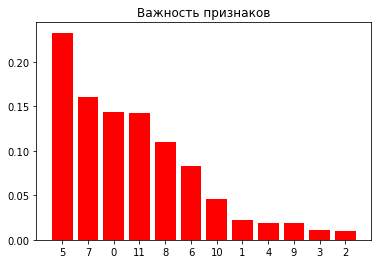

In [82]:
importances = sel.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Важность признаков")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [83]:
importance = pd.DataFrame({'feature': X.columns, 'importance':rf_model.feature_importances_})
importance.sort_values(by='importance', ascending=False)

,feature,importance
5,age,0.244355
7,balance,0.175124
11,estimated_salary,0.134549
0,score,0.133646
8,products,0.102808
6,objects,0.079536
10,loyalty,0.041374
1,city_Ростов Великий,0.025040
4,gender,0.021466
9,creditcard,0.018367


Получается, что на отток больше всего влияют `возраст`, `баланс`, `зарплата`

## Вывод 4 шага

- По параметру Accuracy "Логистическая регрессия" проигрывает "Случайный лес" (0,72 против 0,86)
- По параметру Precision тоже "Логистическая регрессия" хуже (0,38 проитив 0,77)
- По параметру Recall выигрывает "Логистическая регрессия" (0,64 против 0,41)
- По параметру F1 "Логистическая регрессия" снова проигрывает "Случайный лес" (0,48 против 0,54)
- По параметру ROC_AUC "Случайный лес" впереди (0,73 против 0,85)
- Показатели метрик у моделей все таки разные, "Случайный лес" немного выигрывает
- У моделей в целом средние показатели
- В передискредитированной моделе результаты хуже, чем в первоначальном варианте
- В бинарной моделе по параметру Accuracy "Логистическая регрессия" немного выигрывает (0,57 против 0,52)
- В бинарной моделе по параметру ROC_AUC "Логистическая регрессия" и "Случайный лес" равны
- В небинарной моделе снова победил "Случайный лес"
- На отток больше всего влияют возраст, баланс, зарплата

# Сегментация пользователей на основе данных о количестве потребляемых продуктов

In [84]:
data.head(1)

,userid,score,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,city_Ростов Великий,city_Рыбинск,city_Ярославль
0,15677338,619,1,42,2,NaN,1,1,1,101348.88,1,0,0,1


## Сегментация пользователей

In [85]:
#разделим клиентов по количеству потребляемых продуктов банка. Вспомним значения
data['products'].describe()

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: products, dtype: float64

In [86]:
data['products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: products, dtype: int64

## Средние значения признаков для каждого сегмента

In [87]:
#средние значения признаков по кластерам
data.groupby('products').mean().T.round(1)

products,1,2,3,4
userid,15732367.9,15734841.5,15741816.5,15719361.3
score,649.1,652.2,648.1,653.6
gender,0.5,0.4,0.6,0.6
age,39.7,37.8,43.2,45.7
objects,5.0,5.1,5.0,5.3
balance,119894.2,119660.9,119475.7,122260.6
creditcard,0.7,0.7,0.7,0.7
loyalty,0.5,0.5,0.4,0.5
estimated_salary,99487.3,100452.0,104318.1,104763.7
churn,0.3,0.1,0.8,1.0


**Рассмотрим характерные черты каждого кластера**

**Класстер 1:**
- Средний баланс счета
- Но самая низкая зп
- Средний уровень оттока

**Кластер 2:**
- Преобладают мужчины
- Возраст самый низкий
- Средний балас счета
- Самый маленький отток

**Кластер 3:**
- Самый низкий кредитный балл
- Большинство живут в области
- Меньше недвиждимости
- Малоативные клиенты
- Самый большой отток

**Кластер 4:**
- Самый высокий кредитный балл
- Большинство живут в Ярославле
- Клиенты старше других
- Больше всего недвижимости
- Самый высокий баланс счета
- Самая высока зп
- Самый маленький отток

## Распределения признаков для сегментов

In [88]:
nobinar_1 = nobinar[['score', 'age', 'objects', 'balance', 'products', 'estimated_salary']]
nobinar_1['balance'] = data['balance']
nobinar_1

,score,age,objects,balance,products,estimated_salary
0,619,42,2,NaN,1,101348.88
1,608,41,1,83807.86,1,112542.58
2,502,42,8,159660.80,3,113931.57
3,699,39,1,NaN,2,93826.63
4,850,43,2,125510.82,1,79084.10
...,...,...,...,...,...,...
9995,771,39,5,NaN,2,96270.64
9996,516,35,10,57369.61,1,101699.77
9997,709,36,7,NaN,1,42085.58
9998,772,42,3,75075.31,2,92888.52


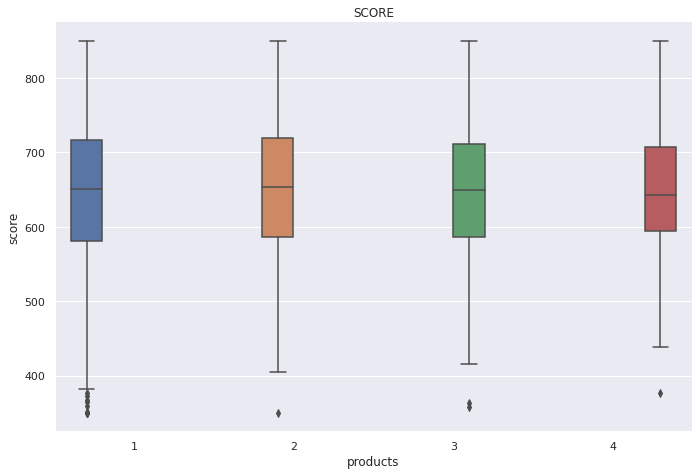

In [89]:
sns.set()
sns.catplot(x="products", y="score", kind='box',hue="products", data=nobinar_1)
plt.title('SCORE')
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)
plt.show()

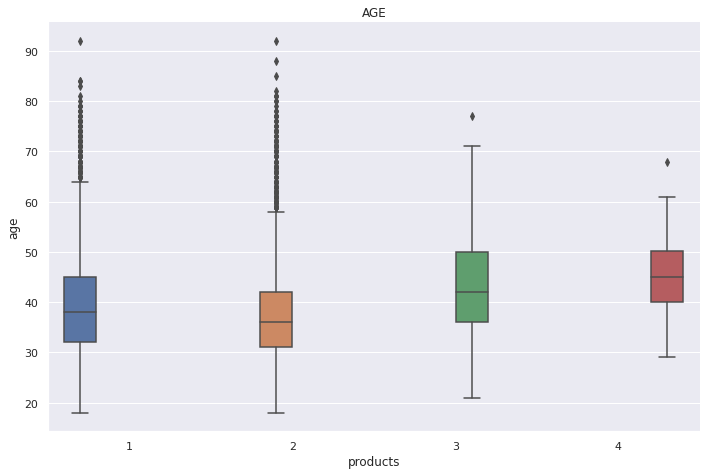

In [90]:
sns.set()
sns.catplot(x="products", y="age", kind='box',hue="products", data=nobinar_1)
plt.title('AGE')
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)
plt.show()

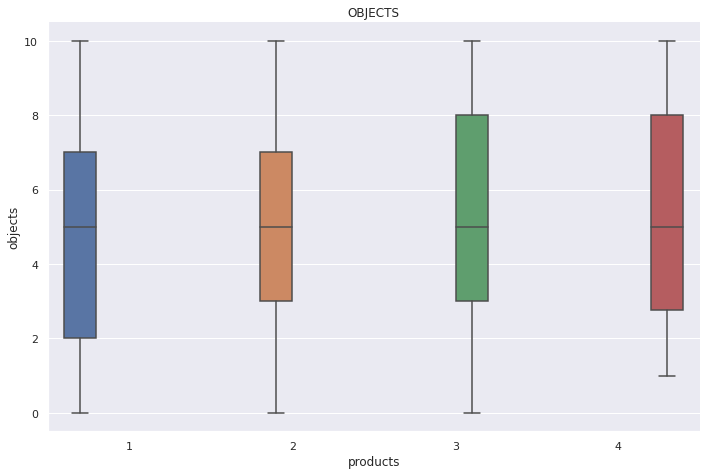

In [91]:
sns.set()
sns.catplot(x="products", y="objects", kind='box',hue="products", data=nobinar_1)
plt.title('OBJECTS')
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)
plt.show()

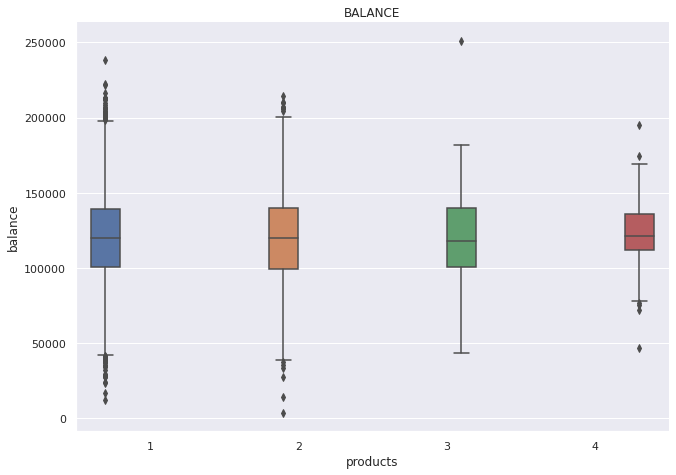

In [92]:
sns.set()
sns.catplot(x="products", y="balance", kind='box',hue="products", data=nobinar_1)
plt.title('BALANCE')
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)
plt.show()

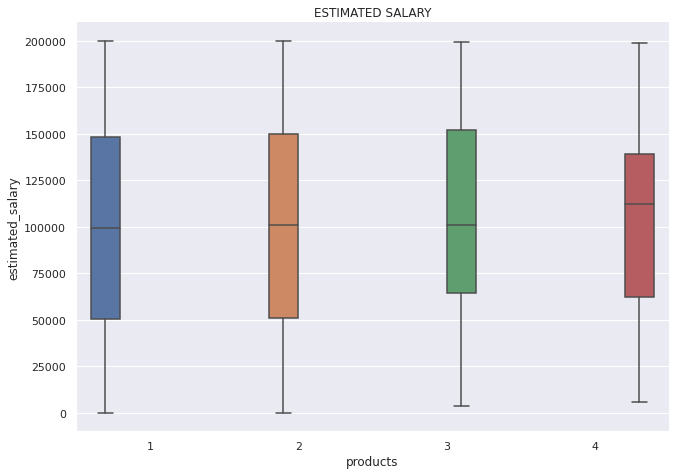

In [93]:
sns.set()
sns.catplot(x="products", y="estimated_salary", kind='box',hue="products", data=nobinar_1)
plt.title('ESTIMATED SALARY')
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)
plt.show()

**Рассмотрим графики:**
- `score` -  у первого сегмента больше увсего выбросов ниже минимума. У всех сегментов одинаковое верхнее значение, немного различается медиана
- `age` - самые юные клиенты в основном в сегменте 1 и 2. И в тех же сегментах много выбросов после Q3. В каждом сегменте есть выбросы сверху, что говорит о том, что максимальные значения в группах за пределами графика
- `objects` - почти равномерно распределение, но в 4 сегменте минимально 1 объект, а не 0. А медиана у всех одинаковая 
- `balance` - распределение почти равномерное. Во всех группах большинство на счету имеют от 100 до 150 тыс. Самый минимальный выброс во 2 сегменте, а максимальный в 3. В первом сегменте тоже встречаются не большие счета. Только в 3 сегменте, почти нет выбросов. В 4 сегменте Q1 самый высокий.
- `estimated_salary` - тоже все равномерно, но самый минимум у 1 и 2 сегмента, у 4 сегмента минимальный порог намного выше, высокие показатели есть в кажжлм сегменте. У 4 сегмента медиана выше всех


In [94]:
binar_0 = data[['products', 'gender', 'creditcard', 'loyalty', 'city_Ростов Великий', 'city_Рыбинск', 'city_Ярославль']]
binar_0.head()

,products,gender,creditcard,loyalty,city_Ростов Великий,city_Рыбинск,city_Ярославль
0,1,1,1,1,0,0,1
1,1,1,0,1,0,1,0
2,3,1,1,0,0,0,1
3,2,1,0,0,0,0,1
4,1,1,1,1,0,1,0


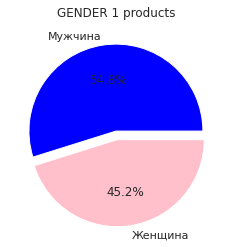

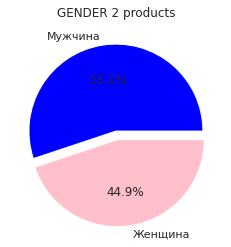

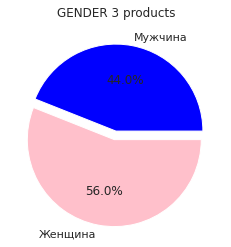

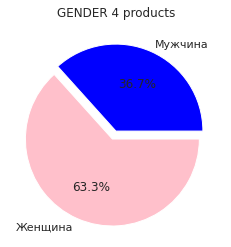

In [95]:
sizes1 = binar_0.query('products ==1')['gender'].value_counts()
sizes2 = binar_0.query('products ==2')['gender'].value_counts()
sizes3 = binar_0.query('products ==3')['gender'].value_counts().sort_values()
sizes4 = binar_0.query('products ==4')['gender'].value_counts().sort_values()

colors = ["blue","pink"] 
labels = 'Мужчина', 'Женщина'
explode = (0, 0.1)

plt.pie(sizes1, explode=explode, colors=colors, labels=labels,
        autopct='%1.1f%%')
plt.title('GENDER 1 products')
plt.show()

plt.pie(sizes2, explode=explode, colors=colors, labels=labels,
        autopct='%1.1f%%')
plt.title('GENDER 2 products')
plt.show()

plt.pie(sizes3, explode=explode, colors=colors, labels=labels,
        autopct='%1.1f%%')
plt.title('GENDER 3 products')
plt.show()

plt.pie(sizes4, explode=explode, colors=colors, labels=labels,
        autopct='%1.1f%%')
plt.title('GENDER 4 products')
plt.show()

`gender` - в 3 и 4 сегментах преобладают женщины

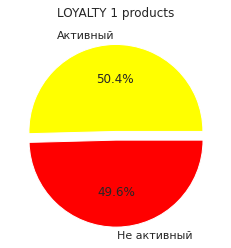

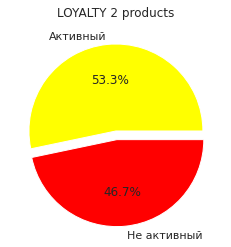

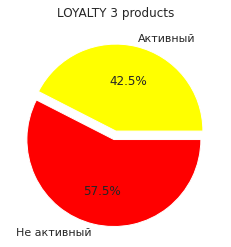

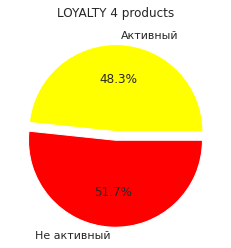

In [96]:
loyalty1 = binar_0.query('products ==1')['loyalty'].value_counts(sort = True)
loyalty2 = binar_0.query('products ==2')['loyalty'].value_counts(sort = True)
loyalty3 = binar_0.query('products ==3')['loyalty'].value_counts(sort = True).sort_values()
loyalty4 = binar_0.query('products ==4')['loyalty'].value_counts(sort = True).sort_values()

colors = ["yellow","red"] 
labels = 'Активный', 'Не активный'
explode = (0, 0.1)

plt.pie(loyalty1, explode=explode, colors=colors, labels=labels,
        autopct='%1.1f%%')
plt.title('LOYALTY 1 products')
plt.show()

plt.pie(loyalty2, explode=explode, colors=colors, labels=labels,
        autopct='%1.1f%%')
plt.title('LOYALTY 2 products')
plt.show()

plt.pie(loyalty3, explode=explode, colors=colors, labels=labels,
        autopct='%1.1f%%')
plt.title('LOYALTY 3 products')
plt.show()

plt.pie(loyalty4, explode=explode, colors=colors, labels=labels,
        autopct='%1.1f%%')
plt.title('LOYALTY 4 products')
plt.show()

`loyalty` - больше всего доля лояльных во 2 сегменте, меньше всего в 3

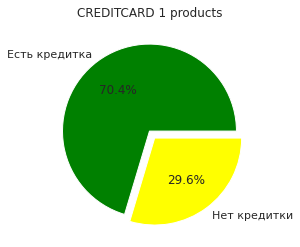

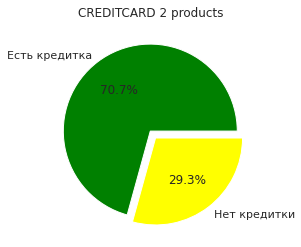

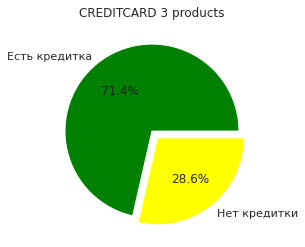

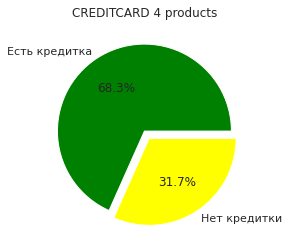

In [97]:
card1 = binar_0.query('products ==1')['creditcard'].value_counts(sort = True)
card2 = binar_0.query('products ==2')['creditcard'].value_counts(sort = True)
card3 = binar_0.query('products ==3')['creditcard'].value_counts(sort = True)
card4 = binar_0.query('products ==4')['creditcard'].value_counts(sort = True)

colors = ["green","yellow"] 
labels = 'Есть кредитка', 'Нет кредитки'
explode = (0, 0.1)

plt.pie(card1, explode=explode, colors=colors, labels=labels,
        autopct='%1.1f%%')
plt.title('CREDITCARD 1 products')
plt.show()

plt.pie(card2, explode=explode, colors=colors, labels=labels,
        autopct='%1.1f%%')
plt.title('CREDITCARD 2 products')
plt.show()

plt.pie(card3, explode=explode, colors=colors, labels=labels,
        autopct='%1.1f%%')
plt.title('CREDITCARD 3 products')
plt.show()

plt.pie(card4, explode=explode, colors=colors, labels=labels,
        autopct='%1.1f%%')
plt.title('CREDITCARD 4 products')
plt.show()

`creditcard` - во всех сегментах примерно 70% имеют кредитные карты

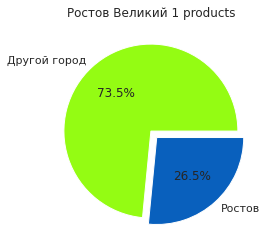

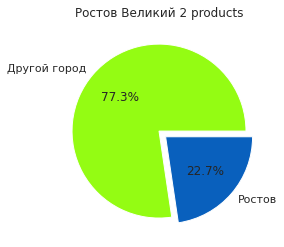

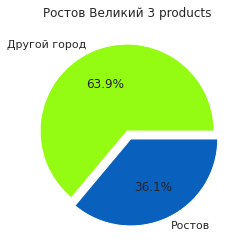

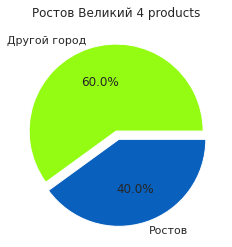

In [98]:
city1 = binar_0.query('products ==1')['city_Ростов Великий'].value_counts(sort = True)
city2 = binar_0.query('products ==2')['city_Ростов Великий'].value_counts(sort = True)
city3 = binar_0.query('products ==3')['city_Ростов Великий'].value_counts(sort = True)
city4 = binar_0.query('products ==4')['city_Ростов Великий'].value_counts(sort = True)

colors = ["#94fc13","#0960bd"] 
labels = 'Другой город', 'Ростов'
explode = (0, 0.1)

plt.pie(city1, explode=explode, colors=colors, labels=labels,
        autopct='%1.1f%%')
plt.title('Ростов Великий 1 products')
plt.show()

plt.pie(city2, explode=explode, colors=colors, labels=labels,
        autopct='%1.1f%%')
plt.title('Ростов Великий 2 products')
plt.show()

plt.pie(city3, explode=explode, colors=colors, labels=labels,
        autopct='%1.1f%%')
plt.title('Ростов Великий 3 products')
plt.show()

plt.pie(city4, explode=explode, colors=colors, labels=labels,
        autopct='%1.1f%%')
plt.title('Ростов Великий 4 products')
plt.show()

`city_Ростов Великий` - большая доля в 3 и 4 сегментах

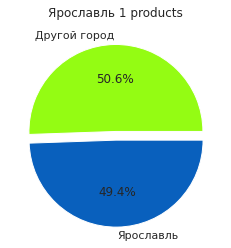

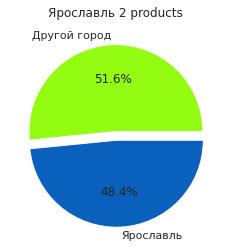

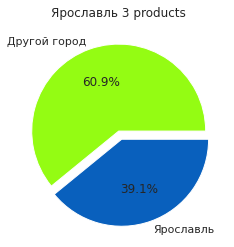

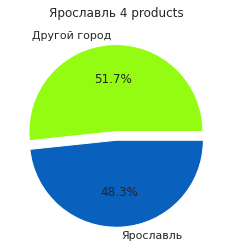

In [99]:
city1 = binar_0.query('products ==1')['city_Ярославль'].value_counts(sort = True)
city2 = binar_0.query('products ==2')['city_Ярославль'].value_counts(sort = True)
city3 = binar_0.query('products ==3')['city_Ярославль'].value_counts(sort = True)
city4 = binar_0.query('products ==4')['city_Ярославль'].value_counts(sort = True)

colors = ["#94fc13","#0960bd"] 
labels = 'Другой город', 'Ярославль', 
explode = (0, 0.1)

plt.pie(city1, explode=explode, colors=colors, labels=labels,
        autopct='%1.1f%%')
plt.title('Ярославль 1 products')
plt.show()

plt.pie(city2, explode=explode, colors=colors, labels=labels,
        autopct='%1.1f%%')
plt.title('Ярославль 2 products')
plt.show()

plt.pie(city3, explode=explode, colors=colors, labels=labels,
        autopct='%1.1f%%')
plt.title('Ярославль 3 products')
plt.show()

plt.pie(city4, explode=explode, colors=colors, labels=labels,
        autopct='%1.1f%%')
plt.title('Ярославль 4 products')
plt.show()

`Ярославль` - Большая доля в 1 сегменте

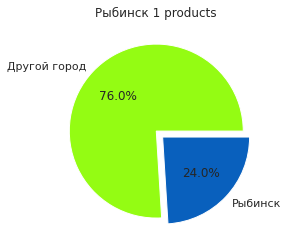

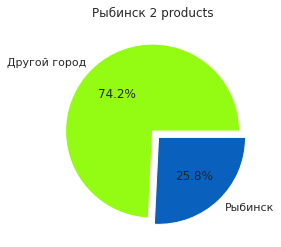

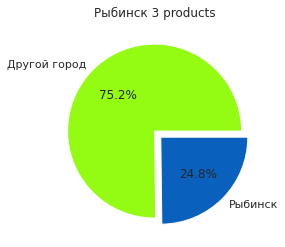

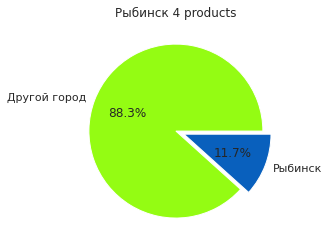

In [100]:
city1 = binar_0.query('products ==1')['city_Рыбинск'].value_counts(sort = True)
city2 = binar_0.query('products ==2')['city_Рыбинск'].value_counts(sort = True)
city3 = binar_0.query('products ==3')['city_Рыбинск'].value_counts(sort = True)
city4 = binar_0.query('products ==4')['city_Рыбинск'].value_counts(sort = True)

colors = ["#94fc13","#0960bd"] 
labels = 'Другой город', 'Рыбинск'
explode = (0, 0.1)

plt.pie(city1, explode=explode, colors=colors, labels=labels,
        autopct='%1.1f%%')
plt.title('Рыбинск 1 products')
plt.show()

plt.pie(city2, explode=explode, colors=colors, labels=labels,
        autopct='%1.1f%%')
plt.title('Рыбинск 2 products')
plt.show()

plt.pie(city3, explode=explode, colors=colors, labels=labels,
        autopct='%1.1f%%')
plt.title('Рыбинск 3 products')
plt.show()

plt.pie(city4, explode=explode, colors=colors, labels=labels,
        autopct='%1.1f%%')
plt.title('Рыбинск 4 products')
plt.show()

`Рыбинск` - больше всего доля в 2 сегменте

## Доли оттока в сегментах

In [101]:
#Для каждого полученного кластера посчитаем долю оттока
data.groupby('products')['churn'].mean()

products
1    0.277144
2    0.075817
3    0.827068
4    1.000000
Name: churn, dtype: float64

- Для 1 кластера: **27%** средний показатель
- Для 2 кластера: **7%** самый низкий показатель
- Для 3 кластера: **82%** очень высокий показатель
- Для 4 кластера: **100%** максимальный отток всех клиентов

## Зависимость признаков между друг другом в каждом сегменте

**наличие кредитной карты и дебетовый счет**

In [102]:
data.query('creditcard == 0').head()

,userid,score,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,city_Ростов Великий,city_Рыбинск,city_Ярославль
1,15690047,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1,0
3,15744090,699,1,39,1,NaN,2,0,0,93826.63,0,0,0,1
8,15835101,501,0,44,4,142051.07,2,0,1,74940.50,0,0,0,1
10,15810557,528,0,31,6,102016.72,2,0,0,80181.12,0,0,0,1
13,15734219,549,1,25,5,NaN,2,0,0,190857.79,0,0,0,1


In [103]:
data.query('creditcard == 1').head()

,userid,score,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,city_Ростов Великий,city_Рыбинск,city_Ярославль
0,15677338,619,1,42,2,NaN,1,1,1,101348.88,1,0,0,1
2,15662040,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0,1
4,15780624,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1,0
5,15616748,645,0,44,8,113755.78,2,1,0,149756.71,1,0,1,0
6,15635267,822,0,50,7,NaN,2,1,1,10062.80,0,0,0,1


- наличие или отсутствие кредитной карты никак не влияет на наличие дебетового счета. 

**зависимость баллов кредитного скоринга от количества объектов**

In [104]:
data.groupby('objects')['score'].mean().sort_values(ascending=False)

objects
10    653.716327
9     653.638211
2     652.832061
0     652.043584
4     651.502528
3     650.530228
5     650.527668
7     649.606031
1     648.806763
8     647.749268
6     647.380558
Name: score, dtype: float64

- выше балл у тех, у кого 10, 9 и 2 объектов. В целом балл примерно одинаковый, зависимости нет.

In [105]:
ccard = data.query('creditcard == 1')
ccard.groupby('churn')['estimated_salary'].median()

churn
0     99019.650
1    100703.065
Name: estimated_salary, dtype: float64

In [106]:
no_ccard = data.query('creditcard == 0')
no_ccard.groupby('churn')['estimated_salary'].median()

churn
0    100584.27
1    107112.25
Name: estimated_salary, dtype: float64

- сравнение двух групп: наличия кредитной карты и отсутствия. Отток клиентов в той категории и в той, в зависимости от размера заработной платы не сильно различаются

##  "Портреты" клиентов

In [107]:
data.query('products == 4').describe()

,userid,score,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,city_Ростов Великий,city_Рыбинск,city_Ярославль
count,6.000000e+01,60.000000,60.000000,60.000000,60.000000,46.000000,60.0,60.000000,60.000000,60.000000,60.0,60.000000,60.000000,60.000000
mean,1.571936e+07,653.583333,0.633333,45.683333,5.300000,122260.610870,4.0,0.683333,0.483333,104763.723333,1.0,0.400000,0.116667,0.483333
std,6.814840e+04,101.265600,0.485961,8.619040,2.947564,27761.150772,0.0,0.469102,0.503939,57526.494114,0.0,0.494032,0.323732,0.503939
min,1.561074e+07,376.000000,0.000000,29.000000,1.000000,46870.430000,4.0,0.000000,0.000000,5669.310000,1.0,0.000000,0.000000,0.000000
25%,1.566638e+07,595.000000,0.000000,40.000000,2.750000,112063.295000,4.0,0.000000,0.000000,62033.390000,1.0,0.000000,0.000000,0.000000
50%,1.570775e+07,643.000000,1.000000,45.000000,5.000000,120968.270000,4.0,1.000000,0.000000,112163.105000,1.0,0.000000,0.000000,0.000000
75%,1.576341e+07,708.000000,1.000000,50.250000,8.000000,135527.207500,4.0,1.000000,1.000000,139371.955000,1.0,1.000000,0.000000,1.000000
max,1.585805e+07,850.000000,1.000000,68.000000,10.000000,195238.290000,4.0,1.000000,1.000000,198874.520000,1.0,1.000000,1.000000,1.000000


In [108]:
data.groupby('products')['churn'].sum()

products
1    1409
2     348
3     220
4      60
Name: churn, dtype: int64

**Первый сегмент:** 5084 человека (50%)
- Используют один продукт банка
- Баланс счета: 119894 (от 12.459 до 238.387)
- Возраст: 39.6 (от 18 до 92)
- Зарплата: 99487  (от 11 до 199.970)
- Баллы кредитного скорринга: 649 (от 350 до 850)
- Кредитную карту имеют 70%
- Женщин 45%
- Активных клиентов за последний месяц: 50%
- Отток: 27%
- Город: 49% - Ярославль, 26% - Ростов, 24% - Рыбинск

**Второй сегмент:** 4590 человек (45%)
- Используют два продукта банка
- Баланс счета: 119660 (от 3.768 до 214.436)
- Возраст: 37,7 (от 18 до 92)
- Баллы кредитного скорринга: 652 (от 350 до 850)
- Зарплата: 100452 (от 90 до 199.992)
- Кредитную карту имеют 70%
- Женщин 44%
- Активных клиентов за последний месяц: 53%
- Отток: 7%
- Город: 51% - Ярославль, 25% - Рыбинск, 22% - Ростов

**Третий сегмент:** 266 человек (2,6%)
- Используют три продукта банка
- Баланс счета: 119475 (от 43.772 до 250.989)
- Возраст: 43,1 (от 21 до 77)
- Баллы кредитного скорринга: 648 (от 358 до 850)
- Зарплата: 104318 (от 3.440 до 199.357)
- Кредитную карту имеют 71%
- Женщин 56%
- Активных клиентов за последний месяц: 42%
- Отток: 82%
- Город: 39% - Ярославль, 36% - Ростов, 24% - Рыбинск

**Четвертый сегмент:** 60 человек (0,6%)
- Используют четыре продукта банка
- Баланс счета: 122260 (от 46.870 до 195.238)
- Возраст: 45.6 (от 29 до 68)
- Баллы кредитного скорринга: 653 (от 376 до 850)
- Зарплата: 104763 (от 5.669 до 198.874)
- Минимум 1 объект в собственности
- Кредитную карту имеют 68%
- Женщин 63%
- Активных клиентов за последний месяц: 48%
- Отток: 100%
- Город: 48% - Ярославль, 40% - Ростов, 11% - Рыбинск

## Вывод 5 шага

- Разделили клиентов на кластеры
- Посмотрели характерные черты для каждого кластера в виде распределения средних значений
- Создали графики распределения признаков для кластеров, где посмотрели основные показатели и свойства
- Самый большой отток в 100% из 4 кластера. А самый маленький отток из 2 (7%)
- Наличие или отсутствие кредитной карты никак не влияет на наличие дебетового счета
- Зависимсти баллов кредитного скорринга от количества объектов в собственности нет
- В зависимости от размера заработной платы не сильно различаются отток клиентов

# Статистические гипотезы

## Формулировка статистических гипотез

**Первое** что предстоит проверить - Различие дохода между клиентами по количеству используемых продуктов. Мы уже разделили клиентов на кластеры в зависимости от количества продуктов.


С помощью t-теста и U-тест Манна-Уитни  мы можем проверить наши гипотезы. Отвергать или нет. Разница - степень различия дохода, а именно: разница в сумме.


**Вторая проверка** - Различия баланса между клиентами, которые ушли, и теми, кто остался. Разница - степень различия балансов

**Третья проверка** - Различия в количестве используемых продуктов банка между группой оттока и действующими клиентами. Разница - количество продуктов

**Четвертая проверка** - Различия баллов кредитного скорринга между клиентами, пользующимися двумя продуктами и четырьмя. Разница - степень различия баллов

**Пятая проверка** - Возраст влияет на факт оттока. Разница - степень различия возрастов в группах

## Проверка гипотез

### Гипотеза 1

**Различие дохода между клиентами по количеству используемых продуктов**

Мы будем сравнивать только две группы: тех, кто пользуется одним продуктом, и тех, кто пользуется двумя продуктами

- Н0 - Различие дохода между клиентами по количеству используемых продуктов нет
- Н1 - Различие дохода между клиентами по количеству используемых продуктов есть

In [109]:
ES = data.groupby('products')['estimated_salary'].mean().reset_index().round(2)
ES

,products,estimated_salary
0,1,99487.26
1,2,100452.01
2,3,104318.13
3,4,104763.72


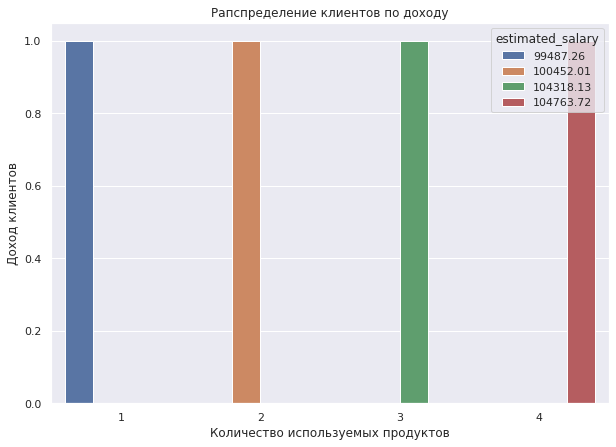

In [110]:
plt.figure(figsize=(10, 7))
sns.countplot(x='products', hue='estimated_salary', data=ES)
plt.title('Рапспределение клиентов по доходу')
plt.xlabel('Количество используемых продуктов')
plt.ylabel('Доход клиентов')
plt.show()

In [111]:
#тест на полноценных выборках

es1 = data.query('products == 1')
es1 = es1['estimated_salary']
es2 = data.query('products == 2')
es2 = es2['estimated_salary']

In [112]:
#используем U-тест Манна-Уитни

data1, data2 = es1, es2
stat, p = mannwhitneyu(data1, data2, alternative = 'two-sided')

print('Statistics=%.3f, p=%.3f' % (stat, p))

#применим поправку Бонферрони. То есть а = 0.05\6 = 0.0083
alpha = 0.0083
if p > alpha:
    print('Доход не различается (нельзя отвергать нулевую гипотезу)')
else:
    print('Доход различается (можно отвергнуть нулевую гипотезу)')

Statistics=11554276.000, p=0.408
Доход не различается (нельзя отвергать нулевую гипотезу)


In [113]:
#t-test
pay_1 = es1
pay_2 = es2
alpha=0.0083
results = st.ttest_ind(pay_1,pay_2, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Доход различается (можно отвергнуть нулевую гипотезу)')
else:
    print('Доход не различается (нельзя отвергать нулевую гипотезу)')

p-значение: 0.4106493940071987
Доход не различается (нельзя отвергать нулевую гипотезу)


**Итог:** статистически значимых различий в уровне доходов между клиентами, пользующимися одним продуктом, и клиентами, которые пользуются двумя продуктами банка, нет.

### Гипотеза 2

**Различия баланса между клиентами, которые ушли, и теми, кто остался**

- Н0 - Различие баланса между клиентами пофакту оттока нет
- Н1 - Различие баланса между клиентами пофакту оттока есть

In [114]:
CB = data.groupby('churn')['balance'].mean().reset_index().round(2)
CB

,churn,balance
0,0,119535.86
1,1,120746.97


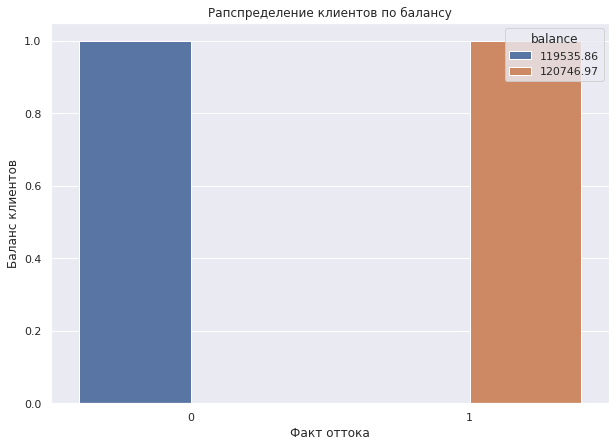

In [115]:
plt.figure(figsize=(10, 7))
sns.countplot(x='churn', hue='balance', data=CB)
plt.title('Рапспределение клиентов по балансу')
plt.xlabel('Факт оттока')
plt.ylabel('Баланс клиентов')
plt.show()

In [116]:
data_churn = data_new.query('churn == 1')
data_churn_bal = data_churn['balance']
data_no_churn = data_new.query('churn == 0')
data_no_churn_bal = data_no_churn['balance']

In [117]:
data_churn_bal.mean()

120531.23054982818

In [118]:
data_no_churn_bal.mean()

119600.28083008916

In [119]:
#используем U-тест Манна-Уитни

data1, data2 = data_churn_bal, data_no_churn_bal
stat, p = mannwhitneyu(data1, data2, alternative = 'two-sided')

print('Statistics=%.3f, p=%.5f' % (stat, p))

alpha = 0.0083
if p > alpha:
    print('Нет различия (нельзя отвергать нулевую гипотезу)')
else:
    print('Есть различия (можно отвергнуть нулевую гипотезу)')

Statistics=8537129.500, p=0.00021
Есть различия (можно отвергнуть нулевую гипотезу)


**Итог:** статистически значимые различия в балансе между клиентами по факту оттока есть.

### Гипотеза 3

**Различия в количестве используемых продуктов банка между группой оттока и действующими клиентами**

- Н0 - Различие по количеству используемых продуктов банка между клиентами по факту оттока нет
- Н1 - Различие по количеству используемых продуктов банка между клиентами по факту оттока есть

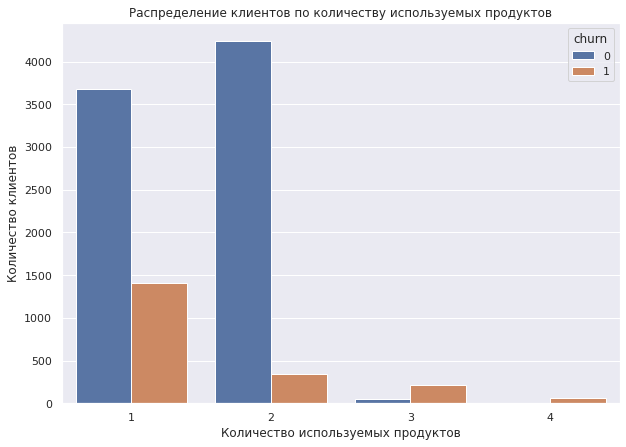

In [120]:
plt.figure(figsize=(10, 7))
sns.countplot(x='products', hue='churn', data=data)
plt.title('Распределение клиентов по количеству используемых продуктов')
plt.xlabel('Количество используемых продуктов')
plt.ylabel('Количество клиентов')
plt.show()

In [121]:
data_churn = data.query('churn == 1')
data_churn = data_churn['products']
data_no_churn = data.query('churn == 0')
data_no_churn = data_no_churn['products']

In [122]:
#используем U-тест Манна-Уитни

data1, data2 = data_churn, data_no_churn
stat, p = mannwhitneyu(data1, data2, alternative = 'two-sided')

print('Statistics=%.3f, p=%.5f' % (stat, p))

alpha = 0.0083
if p > alpha:
    print('Нет различия (нельзя отвергать нулевую гипотезу)')
else:
    print('Есть различия (можно отвергнуть нулевую гипотезу)')

Statistics=6830625.500, p=0.00000
Есть различия (можно отвергнуть нулевую гипотезу)


In [123]:
#t-test
pay_1 = data_churn
pay_2 = data_no_churn
alpha=0.0083
results = st.ttest_ind(pay_1,pay_2, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Доход различается (можно отвергнуть нулевую гипотезу)')
else:
    print('Доход не различается (нельзя отвергать нулевую гипотезу)')

p-значение: 0.00021858494460549394
Доход различается (можно отвергнуть нулевую гипотезу)


**Итог:** статистически значимые различия в количестве продуктов банка между попавшими клиентами в отток и не попавшими есть. Нулевую гипотезу можно отвергнуть

### Гипотеза 4

**Различия баллов кредитного скорринга между клиентами, пользующимися двумя продуктами и четырьмя**

- Н0 - Различие баллов кредитного скорринга между клиентами по количеству используемых продуктов нет
- Н1 - Различие  баллов кредитного скорринга между клиентами по количеству используемых продуктов есть

In [124]:
ESS = data.groupby('products')['score'].mean().reset_index().round(2)
ESS

,products,score
0,1,649.12
1,2,652.19
2,3,648.11
3,4,653.58


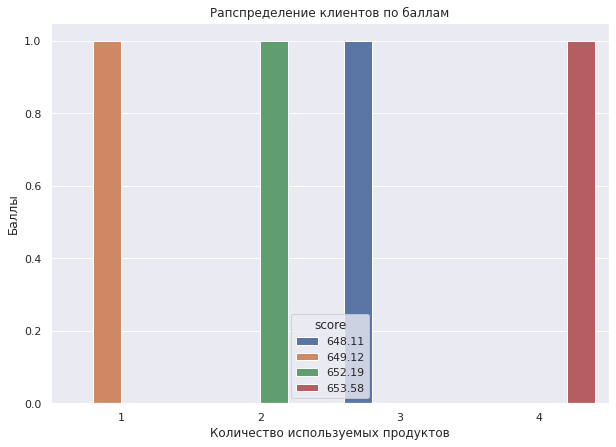

In [125]:
plt.figure(figsize=(10, 7))
sns.countplot(x='products', hue='score', data=ESS)
plt.title('Рапспределение клиентов по баллам')
plt.xlabel('Количество используемых продуктов')
plt.ylabel('Баллы')
plt.show()

In [126]:
es4 = data.query('products == 4')
es4 = es4['score']
ess2 = data.query('products == 2')
ess2 = ess2['score']

In [127]:
#используем U-тест Манна-Уитни

data1, data2 = es4, ess2
stat, p = mannwhitneyu(data1, data2, alternative = 'two-sided')

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.0083
if p > alpha:
    print('Баллы не различаются (нельзя отвергать нулевую гипотезу)')
else:
    print('Баллы различаются (можно отвергнуть нулевую гипотезу)')

Statistics=138148.000, p=0.965
Баллы не различаются (нельзя отвергать нулевую гипотезу)


In [128]:
#t-test
pay_1 = es4
pay_2 = ess2
alpha=0.0083
results = st.ttest_ind(pay_1,pay_2, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Быллы различаются (можно отвергнуть нулевую гипотезу)')
else:
    print('Баллы не различаются (нельзя отвергать нулевую гипотезу)')

p-значение: 0.9158878812583255
Баллы не различаются (нельзя отвергать нулевую гипотезу)


**Итог:** статистически значимых различий в уровне баллов кредитного скорринга между клиентами, пользующимися двумя продуктами, и клиентами, которые пользуются четырьмя продуктами банка, нет.

### Гипотеза 5

**Возраст влияет на факт оттока**

- Н0 - Различие возраста между клиентами по факту оттока нет
- Н1 - Различие возраста между клиентами по факту оттока есть

In [129]:
age = data.groupby('churn')['age'].mean().reset_index().round(1)
age

,churn,age
0,0,37.4
1,1,44.8


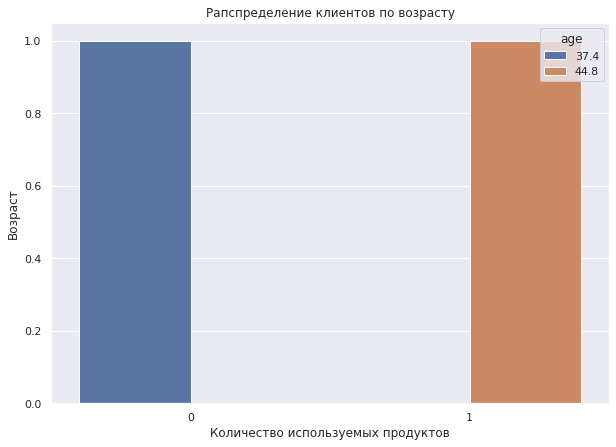

In [130]:
plt.figure(figsize=(10, 7))
sns.countplot(x='churn', hue='age', data=age)
plt.title('Рапспределение клиентов по возрасту')
plt.xlabel('Количество используемых продуктов')
plt.ylabel('Возраст')
plt.show()

In [131]:
d_c = data.query('churn == 1')
d_nc = data.query('churn == 0')
data_churn_age = d_c['age']
data_no_churn_age = d_nc['age']

In [132]:
#используем U-тест Манна-Уитни

data1, data2 = data_churn_age, data_no_churn_age
stat, p = mannwhitneyu(data1, data2, alternative = 'two-sided')

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.0083
if p > alpha:
    print('Возраст не различается (нельзя отвергать нулевую гипотезу)')
else:
    print('Возраст различается (можно отвергнуть нулевую гипотезу)')

Statistics=11874649.500, p=0.000
Возраст различается (можно отвергнуть нулевую гипотезу)


In [133]:
#t-test
pay_1 = data_churn_age
pay_2 = data_no_churn_age
alpha=0.0083
results = st.ttest_ind(pay_1,pay_2, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Возраст различается (можно отвергнуть нулевую гипотезу)')
else:
    print('Возраст не различается (нельзя отвергать нулевую гипотезу)')

p-значение: 4.7127272656641046e-179
Возраст различается (можно отвергнуть нулевую гипотезу)


**Итог:** статистически значимые различия в возрасте между клиентами по факту оттока есть.

### Гипотеза 6

**Различия в активности клиента по факту оттока**

- Н0 - Различие активности между клиентами по факту оттока нет
- Н1 - Различие активности между клиентами по факту оттока есть

In [134]:
loy = data.groupby('churn')['loyalty'].mean().reset_index().round(3)
loy

,churn,loyalty
0,0,0.555
1,1,0.361


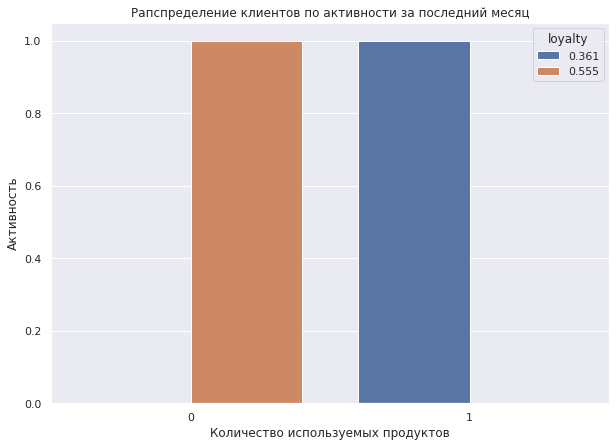

In [135]:
plt.figure(figsize=(10, 7))
sns.countplot(x='churn', hue='loyalty', data=loy)
plt.title('Рапспределение клиентов по активности за последний месяц')
plt.xlabel('Количество используемых продуктов')
plt.ylabel('Активность')
plt.show()

In [136]:
data_churn_loy = d_c['loyalty']
data_no_churn_loy = d_nc['loyalty']

In [137]:
#используем U-тест Манна-Уитни

data1, data2 = data_churn_loy, data_no_churn_loy
stat, p = mannwhitneyu(data1, data2, alternative = 'two-sided')

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.0083
if p > alpha:
    print('Активность не различается (нельзя отвергать нулевую гипотезу)')
else:
    print('Активность различается (можно отвергнуть нулевую гипотезу)')

Statistics=6539022.000, p=0.000
Активность различается (можно отвергнуть нулевую гипотезу)


In [138]:
#t-test
pay_1 = data_churn_loy
pay_2 = data_no_churn_loy
alpha=0.0083
results = st.ttest_ind(pay_1,pay_2, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Активность различается (можно отвергнуть нулевую гипотезу)')
else:
    print('Активность не различается (нельзя отвергать нулевую гипотезу)')

p-значение: 2.384770284779497e-56
Активность различается (можно отвергнуть нулевую гипотезу)


**Итог:** статистически значимые различия активности между клиентами по факту оттока есть.

## Вывод 6 шага

- Сформулировали 6 гипотез и проверили их с помощью  t-теста и U-тест Манна-Уитни.
- Различие дохода между клиентами по количеству используемых продуктов: статистически значимых различий нет
- Различия баланса между клиентами, которые ушли, и теми, кто остался: статистически значимые различия есть
- Различия в количестве используемых продуктов банка между группой оттока и действующими клиентами: статистически значимые различия есть
- Различия баллов кредитного скорринга между клиентами, пользующимися двумя продуктами и четырьмя: статистически значимых различий нет
- Различие возраста между клиентами по факту оттока: статистически значимые различия есть
- Различие активности между клиентами по факту оттока: статистически значимые различия есть

# Общий вывод и рекомендации

**Вывод**

- На отток больше всего влияют (на основе модели прогнозирования):
 - возраст, баланс, зарплата 
- Больше всего отток в Ростове
- Самый большой отток в 100% из 4 кластера (у тех клиентов, кто пользуется четырьмя продуктами банка). Скорее всего это связано с большой нагрузкой клиентов, возможно это несколько кредитов, кредитные карты и страховки. И, судя по всему, не выгодных для клиента. Клиенты стремятся скорее погасить долги и уйти из банка
- Количество продуктов - сильно влияют на отток
- Проявление активности клиентом за последний месяц и его возраст так же сильно влияют на отток


**Рекомендации:**

- Провести проверку банков в Ростове и узнать причину большего оттока. Возможно это связано с некомпетентными сотрудниками
- Увкличивать активность клиентов, привлекать к активному использованию приложения банка, пользование новыми продуктами
- Предлагать клиентами новые продукты, условия. Повышать лояльность
- Провести "работу" с возрастной группой клиентов, предложить новые уникальные условия
- Награждать клиентов, которые давно используют продукты банка, чтобы они дольше оставались с банком и не попадали в категорию оттока
- Предложить рефинансирование клиентам с двумя и четырьмя продуктами
- Улучшить качество продуктов банка
- Открыть дебетовые счета всем клиентам, у кого их нет, предложив заманчивые условия
- Предлагать клиентам Ростова такие же продукты, как в других городах

**Дополнительные выводы и рекомендации по сегментам:**
- 1 сегмент: 
 - Встречаются очень низкие балансы счетов
 - Активность половины клиентов в этом сегменте
- 2 сегмент:
 - Меньше всего доля оттока, можно брать пример с этого сегмента 
 - Самая высока активность 
 - Можно поощрить клиентов из этого сегмента для повышения лояльности и удержания клиентов в дальнейшем
- 3 сегмент:
 - Большая доля оттока
 - Необходимо поднимать активность клиентов в первую очередь в этом сегменте
 - Низкий баланс счета, можно сделать акцию процент на остаток, для ограниченного круга клиентов
- 4 сегмент:
 - Предложить рефинансирование клиентам, снизить ставки. 
 - Сокращать долю оттока в сегменте
 - Самый возрастной сегмент, можно предложить специальные условия по вкладам и кредитам, в зависимости от возраста
 - Больше всего клиентов из Ростова, где наблюдается большая проблема с оттоком
 - Больше всего доля женщин, можно разработать спец акции к женским праздникам

Презентация https://docs.google.com/presentation/d/1JFZKc7Zewy6cdhlaiKn0bzx7ZPljQIizJzXgkE88muQ/edit?usp=sharing

Ссылка на дашборд: https://public.tableau.com/app/profile/alena.kudekova/viz/_16671419954990/Dashboard1?publish=yes